In [23]:
import numpy as np
import imageio as iio
import sys
sys.path.insert(0, "../controller")
import tile_configuration
import pathlib
from util import get_image_data

In [24]:
prefix = pathlib.Path(r"C:\Users\davidek\microscope_ui\controller\photo\1732319758.459453")

In [ ]:
tc = tile_configuration.TileConfiguration()                   
tc.load(r"C:\Users\davidek\microscope_ui\controller\photo\1732319758.459453\images.txt")                  
tc.move_to_origin()
s=tile_configuration.tile_config_to_shapely(r"C:\Users\davidek\microscope_ui\controller\photo\1732319758.459453", tc) 


(0.0, 0.0, 2136.0, 1036.0)

In [26]:
width = int(s.bounds[2])
height = int(s.bounds[3])

In [36]:
n = np.zeros( (width, height, 3), dtype=np.uint16)
c = np.zeros( (width, height, 3), dtype=np.uint8)
for image in tc.images:
    fname = prefix / pathlib.Path(image.filename)
    img = iio.imread(fname)
    img = img.swapaxes(0,1)
    #img = np.dstack((img, np.ones((1280, 1024), dtype=np.uint8)))
    x = int(image.x)
    y = int(image.y)
    w = img.shape[0]
    h = img.shape[1]
    n[x:x+w,y:y+h] += img # n[x:x+w,y:y+h] * 0.5 + img * 0.5
    c[x:x+w,y:y+h] += 1
n = n // c
n = n.astype(np.uint8)    


C:\Users\davidek\AppData\Local\Temp\ipykernel_5776\2007764244.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(fname)
C:\Users\davidek\AppData\Local\Temp\ipykernel_5776\2007764244.py:14: RuntimeWarning: divide by zero encountered in floor_divide
  n = n // c


(2136, 1036, 3)


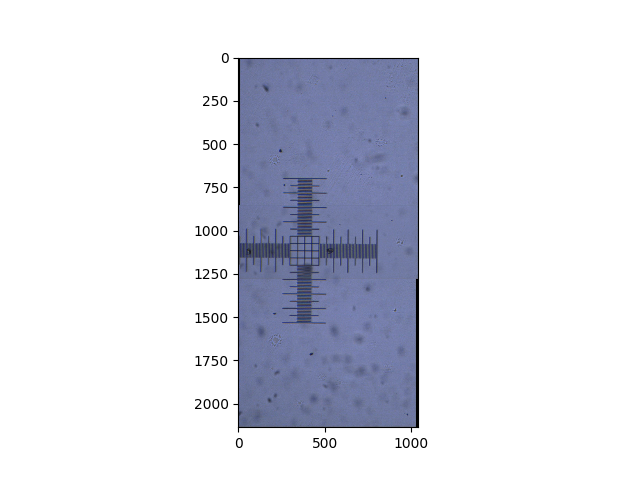

In [37]:
%matplotlib widget 
from matplotlib import pyplot as plt
print(n.shape)
plt.imshow(n, interpolation='nearest')
plt.show()